## Implementing an Arbitrage Trading Strategy for Royal Dutch Shell (RDS) Across AEX and LSE
We'll develop an algorithmic trading strategy to exploit potential arbitrage opportunities between the Royal Dutch Shell (RDS) stock listed on the Amsterdam Stock Exchange (AEX) and the London Stock Exchange (LSE), considering the forex rate between EUR and GBP. Here are the steps:

1. Data Collection: Obtain historical price feeds for RDS from both AEX and LSE, along with historical forex rates for GBP-EUR.
2. Data Processing: Convert the prices to a common currency for comparison.
3. Identify Arbitrage Opportunities: Identify potential arbitrage opportunities where the price discrepancy is large enough to cover transaction costs.
4. Backtesting: Simulate the trades to assess the profitability of the strategy.


### Data Collection

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [21]:
dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq='h')

In [22]:
aex_prices = np.random.uniform(low=20, high=25, size=len(dates))

In [23]:
lse_prices = np.random.uniform(low=18, high=22, size=len(dates))

In [24]:
forex_rates = np.random.uniform(low=1.1, high=1.2, size=len(dates))

In [25]:
aex_data = pd.DataFrame(data={'Date': dates, 'AEX_Price': aex_prices})
lse_data = pd.DataFrame(data={'Date': dates, 'LSE_Price': lse_prices})
forex_data = pd.DataFrame(data={'Date': dates, 'Forex_Rate': forex_rates})

In [26]:
data = pd.merge(aex_data, lse_data, on='Date')
data = pd.merge(data, forex_data, on='Date')
data.set_index('Date', inplace=True)

In [27]:
data

,AEX_Price,LSE_Price,Forex_Rate
Date,,,
2023-01-01 00:00:00,24.264337,20.172883,1.189363
2023-01-01 01:00:00,21.127546,21.355088,1.178617
2023-01-01 02:00:00,21.635531,20.168365,1.177523
2023-01-01 03:00:00,23.023903,18.881964,1.127204
2023-01-01 04:00:00,23.101539,19.530166,1.113517
...,...,...,...
2023-01-09 20:00:00,21.341140,21.936166,1.178751
2023-01-09 21:00:00,23.491646,19.466202,1.112554
2023-01-09 22:00:00,20.719121,21.131855,1.174111


In [28]:
data['LSE_Price_EUR'] = data['LSE_Price'] * data['Forex_Rate']
# Preprocessing

### Identify Arbitrage Opportunities

In [29]:
transaction_cost = 0.1  # Assume a transaction cost of 0.1 EUR/GBP per share

# Identify arbitrage opportunities
data['Arbitrage_Opportunity'] = np.where((data['AEX_Price'] + transaction_cost) < data['LSE_Price_EUR'], 'Buy on AEX, Sell on LSE',
                                         np.where((data['LSE_Price_EUR'] + transaction_cost) < data['AEX_Price'], 'Buy on LSE, Sell on AEX', 'No Opportunity'))

### Backtesting

In [30]:
initial_capital = 100000  # Assume an initial capital of 100,000 EUR
num_shares = 100  
capital = initial_capital
profits = []

In [31]:
for index, row in data.iterrows():
    if row['Arbitrage_Opportunity'] == 'Buy on AEX, Sell on LSE':
        # Buy on AEX and sell on LSE
        profit = (row['LSE_Price_EUR'] - row['AEX_Price']) * num_shares - transaction_cost * 2 * num_shares
        capital += profit
        profits.append(profit)
    elif row['Arbitrage_Opportunity'] == 'Buy on LSE, Sell on AEX':
        # Buy on LSE and sell on AEX
        profit = (row['AEX_Price'] - row['LSE_Price_EUR']) * num_shares - transaction_cost * 2 * num_shares
        capital += profit
        profits.append(profit)
    else:
        profits.append(0)

# Add profits to the dataframe
data['Profit'] = profits
data['Cumulative_Profit'] = data['Profit'].cumsum() + initial_capital

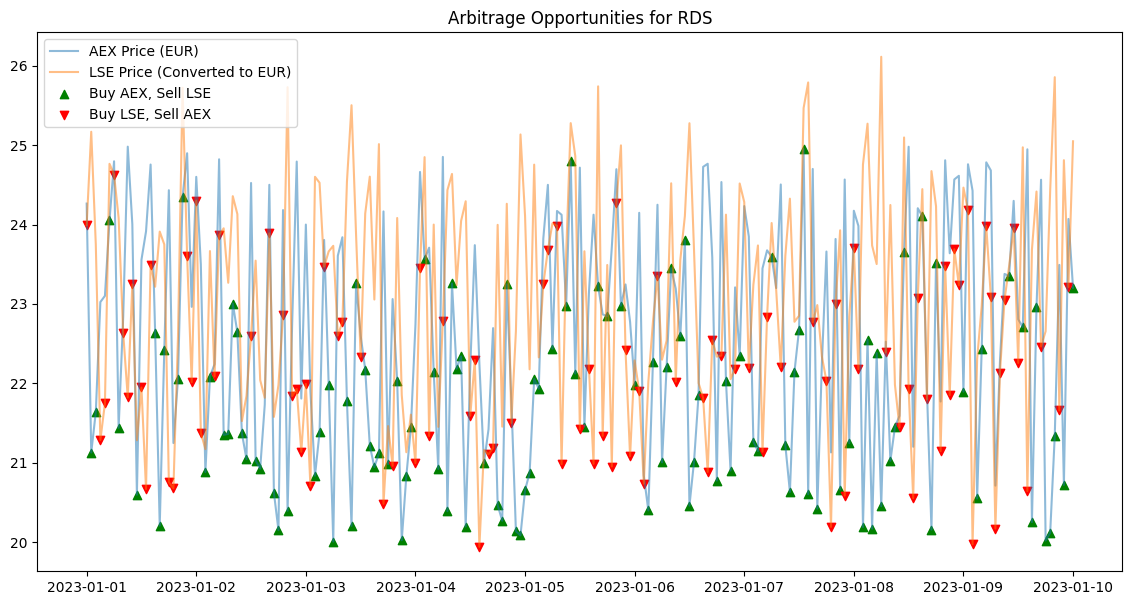

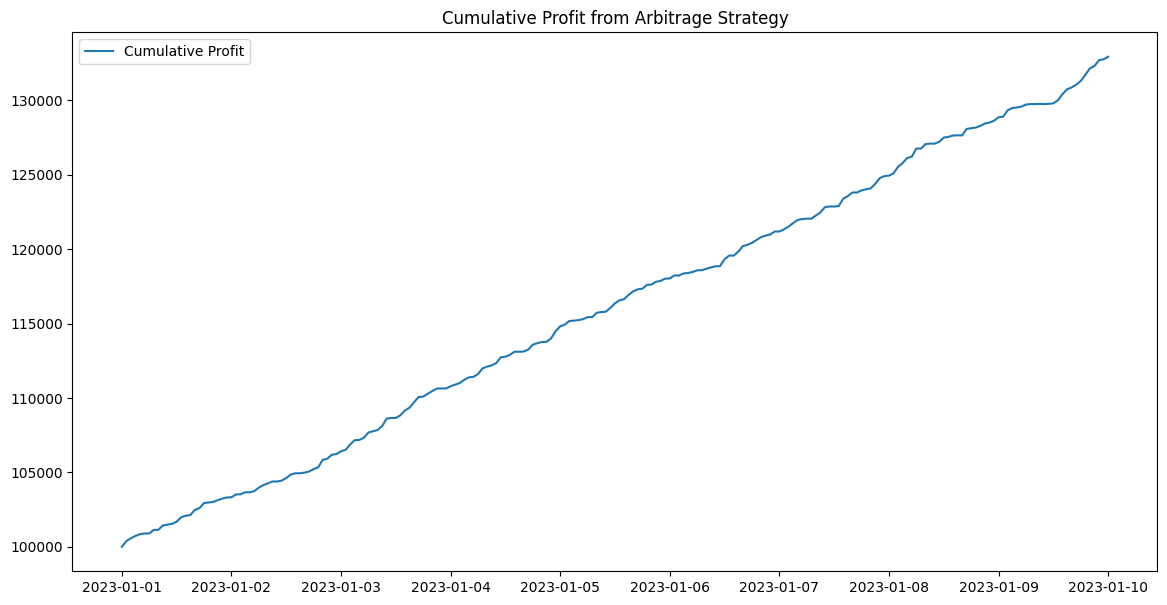

Final Profit: 32926.55 EUR


In [32]:
# Plot the prices and arbitrage opportunities
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['AEX_Price'], label='AEX Price (EUR)', alpha=0.5)
plt.plot(data.index, data['LSE_Price_EUR'], label='LSE Price (Converted to EUR)', alpha=0.5)

# Highlight arbitrage opportunities
buy_aex_sell_lse = data[data['Arbitrage_Opportunity'] == 'Buy on AEX, Sell on LSE']
buy_lse_sell_aex = data[data['Arbitrage_Opportunity'] == 'Buy on LSE, Sell on AEX']

plt.scatter(buy_aex_sell_lse.index, buy_aex_sell_lse['AEX_Price'], color='g', marker='^', label='Buy AEX, Sell LSE')
plt.scatter(buy_lse_sell_aex.index, buy_lse_sell_aex['LSE_Price_EUR'], color='r', marker='v', label='Buy LSE, Sell AEX')

plt.title('Arbitrage Opportunities for RDS')
plt.legend()
plt.show()

# Plot the cumulative profit over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative_Profit'], label='Cumulative Profit')
plt.title('Cumulative Profit from Arbitrage Strategy')
plt.legend()
plt.show()

# Display final profit
final_profit = data['Cumulative_Profit'].iloc[-1] - initial_capital
print(f'Final Profit: {final_profit:.2f} EUR')